In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [2]:
import pandas as pd

path = r"C:\cordio preidiction\cardio_train .csv"
df = pd.read_csv(path, sep=';')

df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<span style="background-color: #E6E6FA;">DATA EXPLORATION</span>

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<span style="background-color: #E6E6FA;">DATA PRE-PROCESSING</span>

In [9]:
df['age_years'] = (df['age'] / 365).round(1)
df['gender_label'] = df['gender'].map({1: "female", 2:"male"})
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m']**2)

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_label,height_m,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,male,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,female,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.7,female,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.3,male,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.9,female,1.56,23.011177


<span style="background-color: #E6E6FA;">DATA ANALYSIS & VISUALIZATION</span>

<span style="background-color: #E6E6FA;">Target Distribution</span>

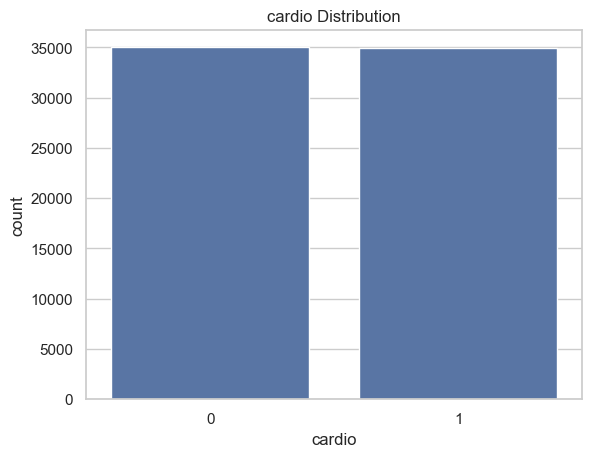

In [12]:
sns.countplot(x='cardio', data=df)
plt.title("cardio Distribution")
plt.show()

<span style="background-color: #E6E6FA;">Age Distribution</span>

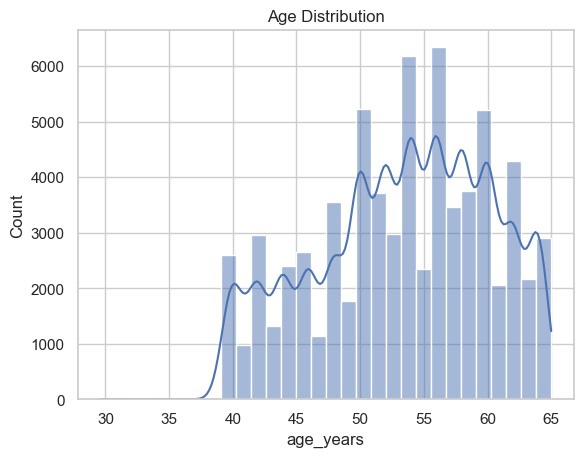

In [13]:
sns.histplot(df['age_years'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

<span style="background-color: #E6E6FA;">Gender Vs Cardio</span>

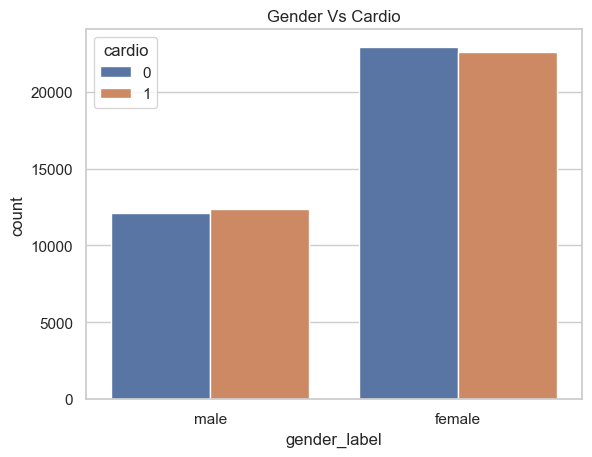

In [14]:
sns.countplot(x='gender_label', hue='cardio', data=df)
plt.title("Gender Vs Cardio")
plt.show()

<span style="background-color: #E6E6FA;">Height & Weight</span>

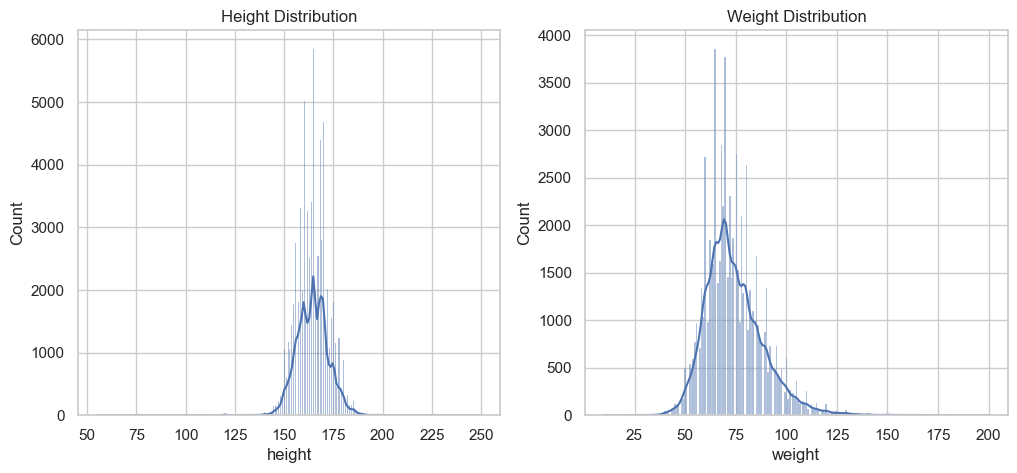

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['height'], kde=True, ax=ax[0])
ax[0].set_title("Height Distribution")

sns.histplot(df['weight'], kde=True, ax=ax[1])
ax[1].set_title("Weight Distribution")
plt.show()

<span style="background-color: #E6E6FA;">Blood Pressure</span>

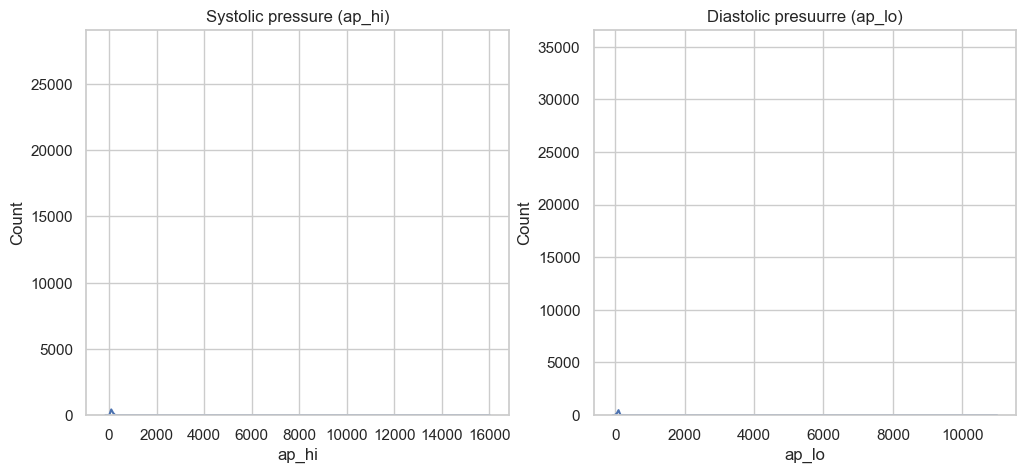

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['ap_hi'], kde=True, ax=ax[0])
ax[0].set_title("Systolic pressure (ap_hi)")

sns.histplot(df['ap_lo'], kde=True, ax=ax[1])
ax[1].set_title("Diastolic presuurre (ap_lo)")
plt.show()

<span style="background-color: #E6E6FA;">BMI Distribution</span>

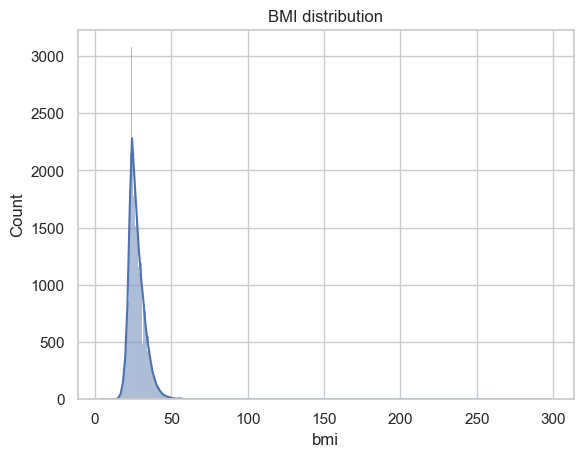

In [17]:
sns.histplot(df['bmi'], kde=True)
plt.title("BMI distribution")
plt.show()

<span style="background-color: #E6E6FA;"> Blood Pressure Scatter</span>

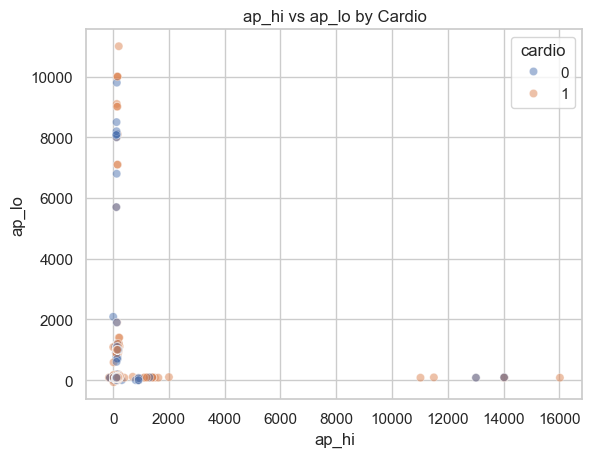

In [18]:
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, alpha=0.5)
plt.title("ap_hi vs ap_lo by Cardio")
plt.show()

<span style="background-color: #E6E6FA;"> Lifestyle Categories</span>

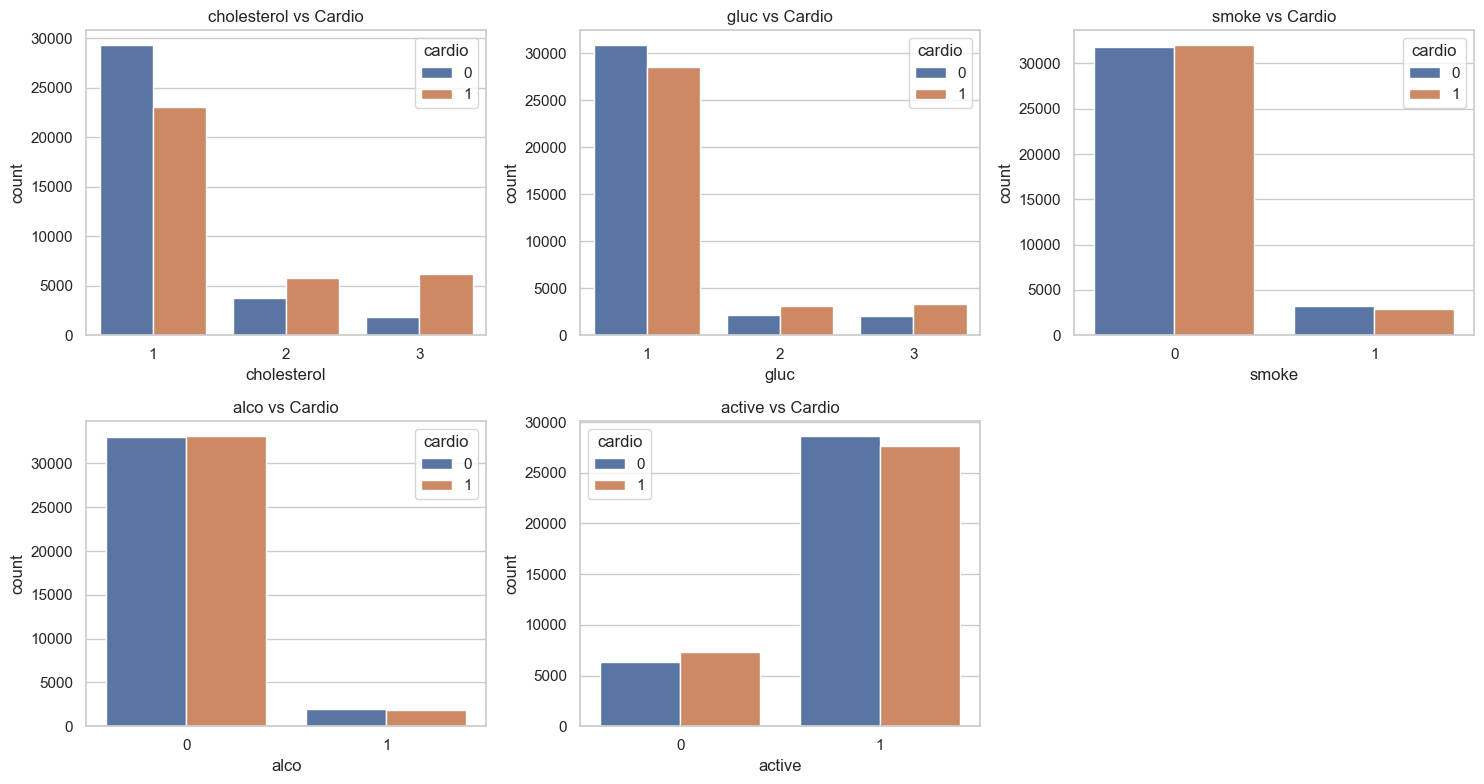

In [19]:
cols = ['cholesterol', 'gluc', 'smoke','alco', 'active']

plt.figure(figsize=(15,8))
for i,col in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue='cardio', data=df)
    plt.title(f"{col} vs Cardio")
plt.tight_layout()
plt.show()

<span style="background-color: #E6E6FA;">Cardio Vs Age </span>

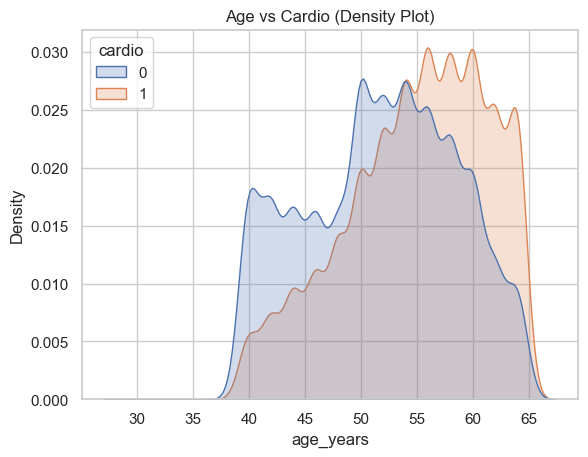

In [20]:
sns.kdeplot(data=df, x='age_years', hue='cardio', fill=True)
plt.title("Age vs Cardio (Density Plot)")
plt.show()

<span style="background-color: #E6E6FA;"> Pairplot With Selected Features </span>

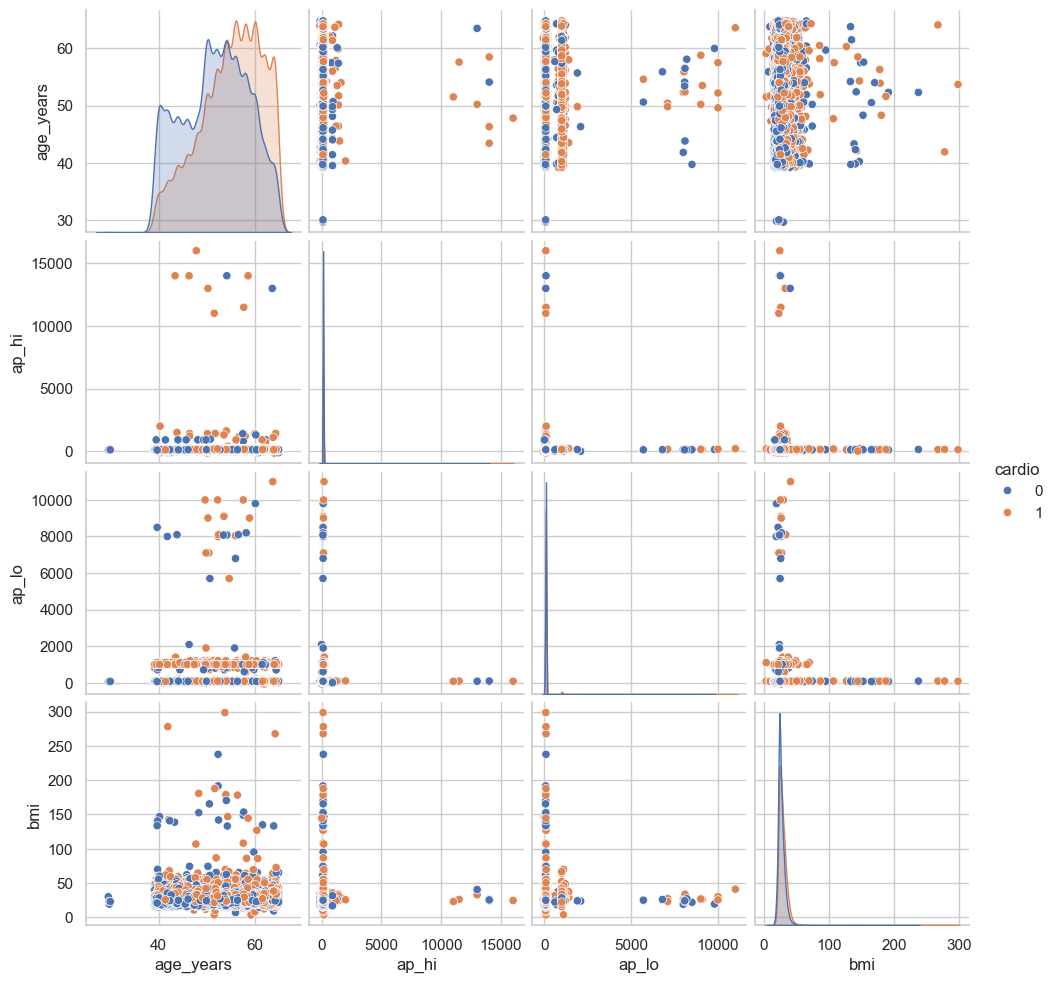

In [21]:
sns.pairplot(df[['age_years', 'ap_hi', 'ap_lo', 'bmi', 'cardio']], hue='cardio')
plt.show()

<span style="background-color: #E6E6FA;"> BMI vs Blood Pressure </span>

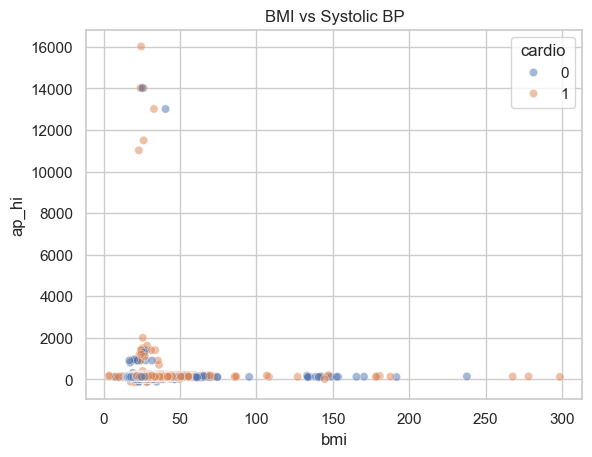

In [22]:
sns.scatterplot(data=df, x='bmi', y='ap_hi', hue='cardio',alpha=0.5)
plt.title("BMI vs Systolic BP")
plt.show()

<span style="background-color: #E6E6FA;"> Boxplot for BMI by Gender </span>

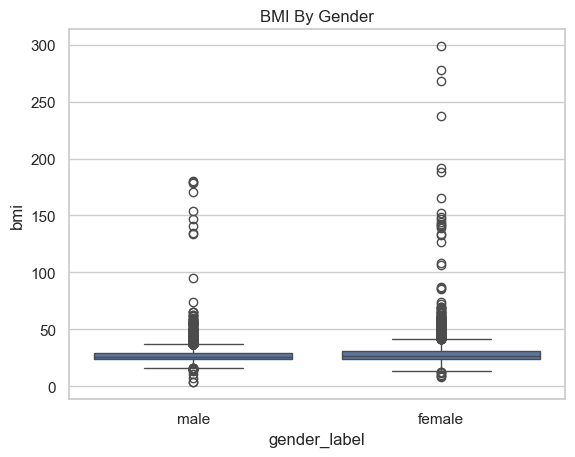

In [24]:
sns.boxplot(x='gender_label', y='bmi', data=df)
plt.title("BMI By Gender")
plt.show()

<span style="background-color: #E6E6FA;"> BP Distribution by Cardio</span>

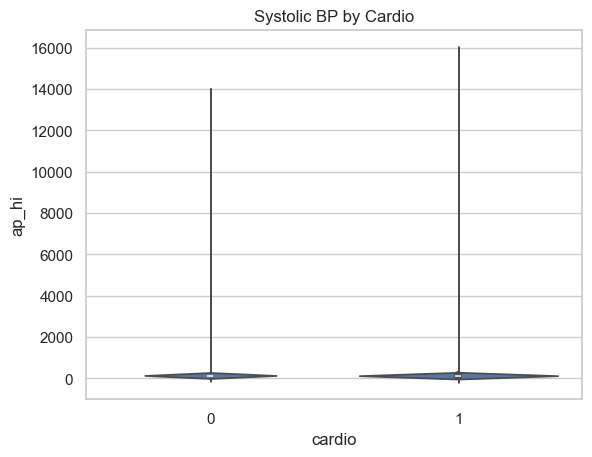

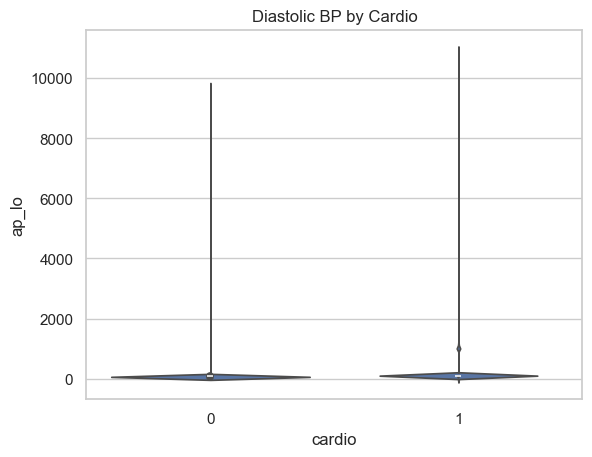

In [25]:
sns.violinplot(x='cardio',y='ap_hi', data=df)
plt.title("Systolic BP by Cardio")
plt.show()

sns.violinplot(x='cardio',y='ap_lo', data=df)
plt.title("Diastolic BP by Cardio")
plt.show()

<span style="background-color: #E6E6FA;"> Cholesterol & Gulcose level </span>

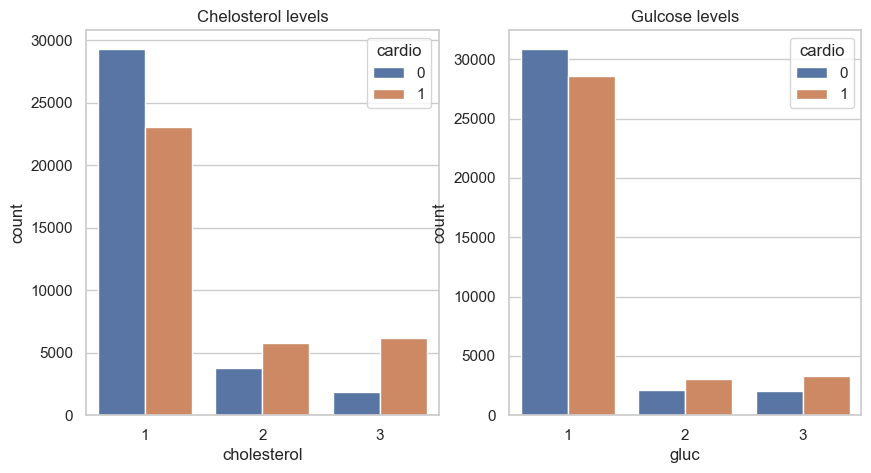

In [26]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='cholesterol', hue='cardio', data=df, ax=ax[0])
sns.countplot(x='gluc', hue='cardio', data=df, ax=ax[1])
ax[0].set_title("Chelosterol levels")
ax[1].set_title("Gulcose levels")
plt.show()

<span style="background-color: #E6E6FA;"> Activity vs Cardio </span>

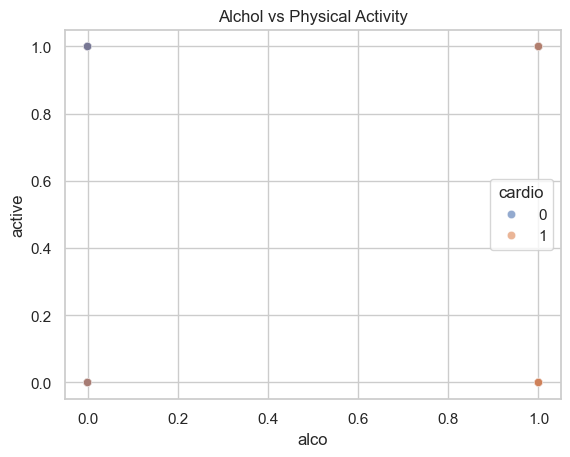

In [27]:
sns.scatterplot(data=df, x='alco', y='active', hue='cardio', alpha=0.6)
plt.title("Alchol vs Physical Activity")
plt.show()

<span style="background-color: #E6E6FA;"> All Numeric Columns </span>

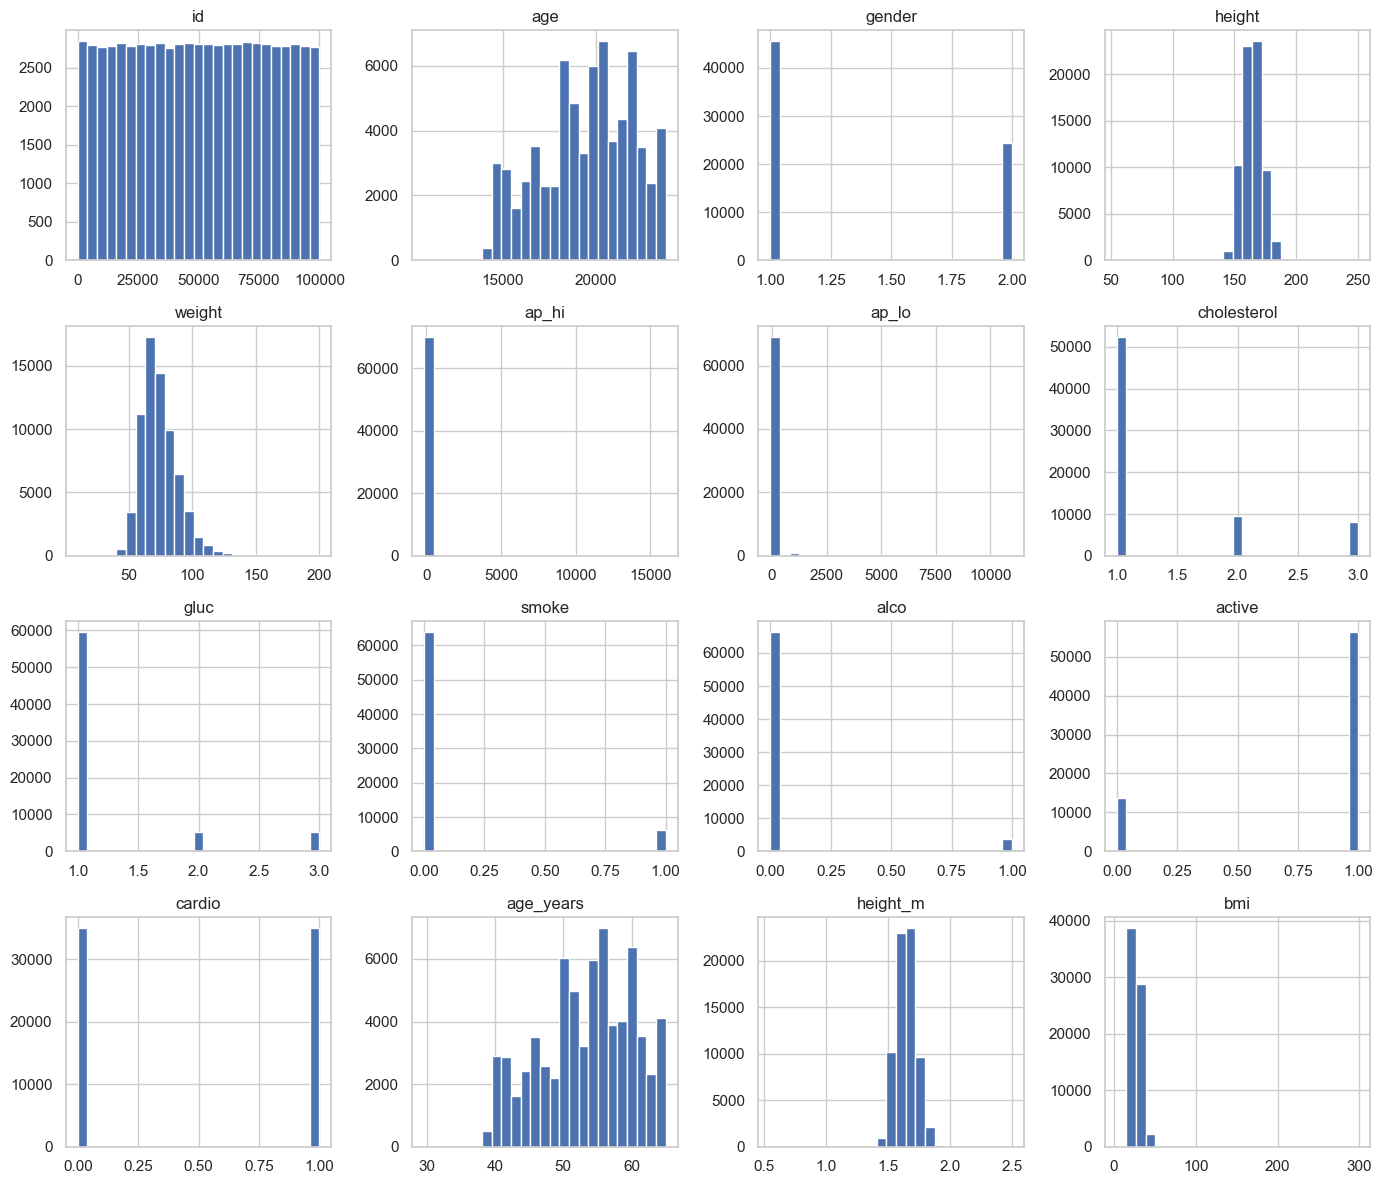

In [28]:
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(figsize=(14,12), bins=25)
plt.tight_layout()
plt.show()

<span style="background-color: #E6E6FA;">CORRELATION HEATMAP</span>

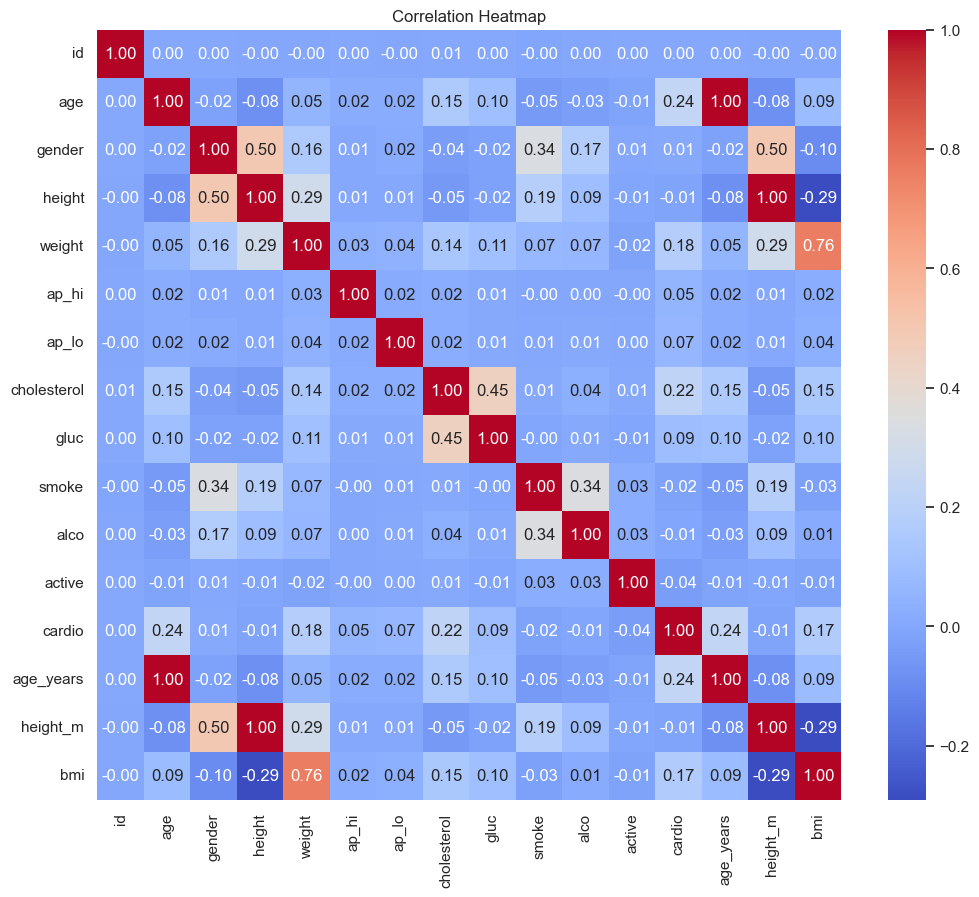

In [29]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<span style="background-color: #E6E6FA;">PREPARING DATA FOR MACHINE LEARNING</span>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['age_years', 'gender','height', 'weight','ap_hi', 'ap_lo',
      'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']]
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
    )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<span style="background-color: #E6E6FA;"> Feature Importance </span>

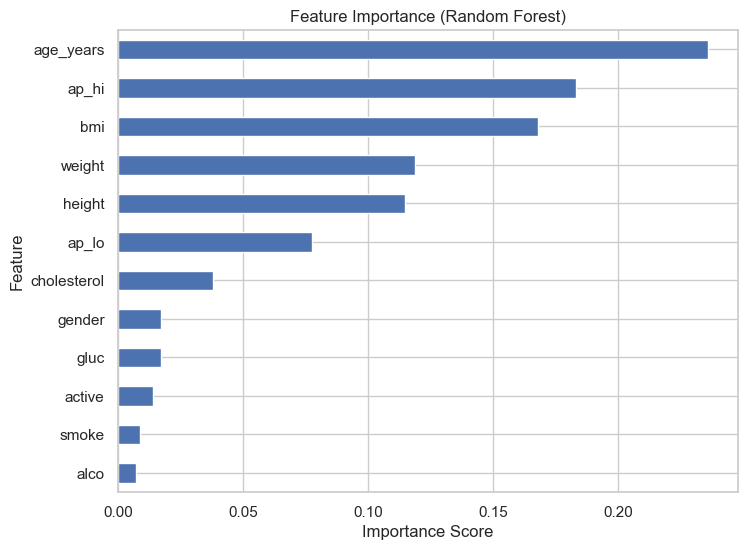

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

<span style="background-color: #E6E6FA;">Train ML Model</span>

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

svm_model = CalibratedClassifierCV(LinearSVC())

models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Support Vector Machine": svm_model,
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("-"*60)

Training Logistic Regression...
Logistic Regression Accuracy: 0.7131
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

------------------------------------------------------------
Training K-Nearest Neighbor...
K-Nearest Neighbor Accuracy: 0.6457
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      7004
           1       0.65      0.63      0.64      6996

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000

------------------------------------------------------------
Training Support Vector Machine...
Support Vector Machine Accuracy: 0.6469
             

<span style="background-color: #E6E6FA;">Accuracy Comparison</span>

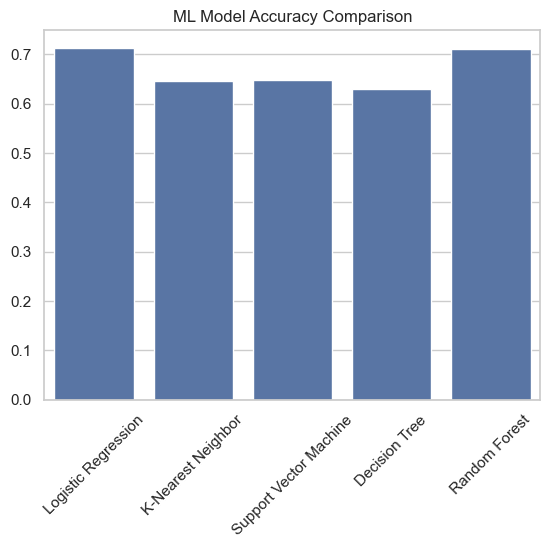

In [42]:
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xticks(rotation=45)
plt.title("ML Model Accuracy Comparison")
plt.show()

<span style="background-color: #E6E6FA;">ROC Curves</span>

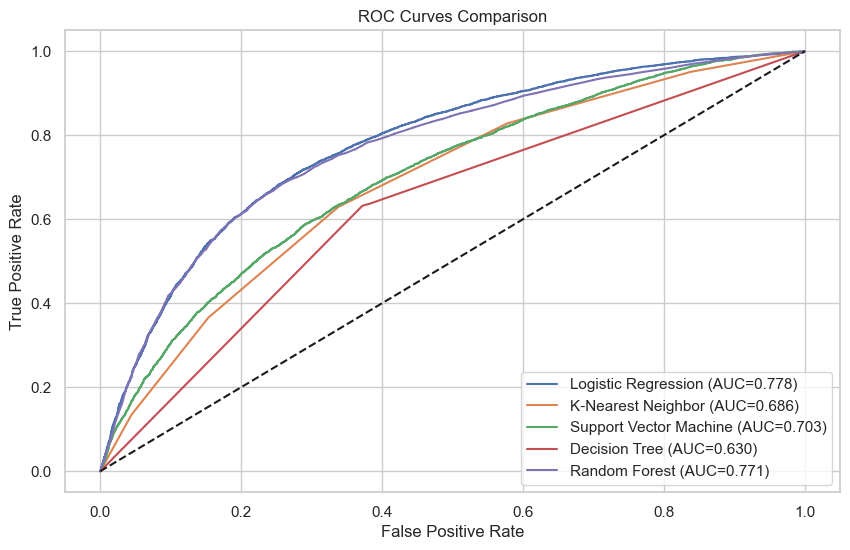

In [47]:
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=(10,6))

for name, model in models.items():
    
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        prob = model.decision_function(X_test)
    else:
        print(f"Skipping {name} (no probability support)")
        continue
    
    fpr, tpr, _=roc_curve(y_test, prob)
    Auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={Auc:.3f})")

plt.plot([0,1],[0,1], 'k--')
plt.legend()
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

<span style="background-color: #E6E6FA;">Best Model </span>

In [48]:
best_model = max(accuracies, key=accuracies.get)
print("Best Model", best_model)

Best Model Logistic Regression
